# Implementation of basic data such as univariate, bivariate and multivariate
---
- Data analysis is the process of inspecting, cleaning, transforming, and modeling data to discover useful information, draw conclusions, and support decision-making. Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying structure of the data before applying advanced modeling techniques. EDA is commonly divided into univariate, bivariate, and multivariate analysis, depending on the number of variables being analyzed simultaneously.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
dataset_path = '/home/faran/Downloads/archive(2)/taxi_trip_pricing.csv'
df = pd.read_csv(dataset_path)
#Random Rows
df.sample(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
393,39.04,Afternoon,Weekday,4.0,Medium,Clear,NaN,1.08,0.28,61.79,62.0444
670,9.50,Afternoon,Weekday,1.0,Low,Clear,2.16,1.22,0.43,36.15,29.2945
668,10.14,Morning,Weekend,4.0,Low,Clear,2.17,0.89,0.27,36.16,NaN
470,NaN,Afternoon,Weekday,3.0,High,Clear,4.37,0.80,0.49,18.39,14.6611
345,31.18,Afternoon,Weekday,1.0,Medium,Clear,2.71,0.79,0.35,89.23,58.5727


In [28]:
df.shape

(1000, 11)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [30]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [31]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


# UNIVARIATE ANALYSIS
---
- Univariate analysis involves examining a single variable/feature/column at a time. The purpose is to understand its distribution, central tendency, spread, and presence of outliers. This is often the first step in EDA because it gives insight into individual variables before studying their relationships with others. Through this analysis, we can find out the following:
    - Describe the main characteristics of a single variable.
    - Detect outliers and missing values.
    - Understand the distribution shape (normal, skewed, uniform).
    - Prepare the data for further analysis or modeling.
- The univariate analysis implementation in different ways is shown below:

In [32]:
pd.value_counts(df['Weather'])

/tmp/ipykernel_8977/3456597206.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Weather'])


Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

/tmp/ipykernel_8977/3300780475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Weather'], palette='Set2')


Text(0.5, 1.0, 'Weather Frequency')

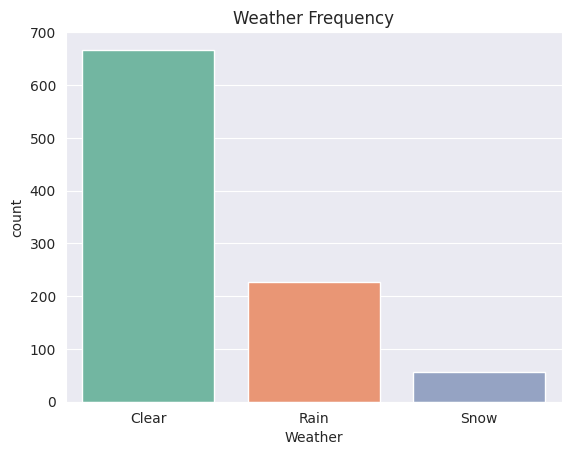

In [33]:
sns.countplot(x=df['Weather'], palette='Set2')
plt.title("Weather Frequency")

/tmp/ipykernel_8977/1598594080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Weather'], palette=custom_color)


Text(0.5, 1.0, 'Weather Frequency')

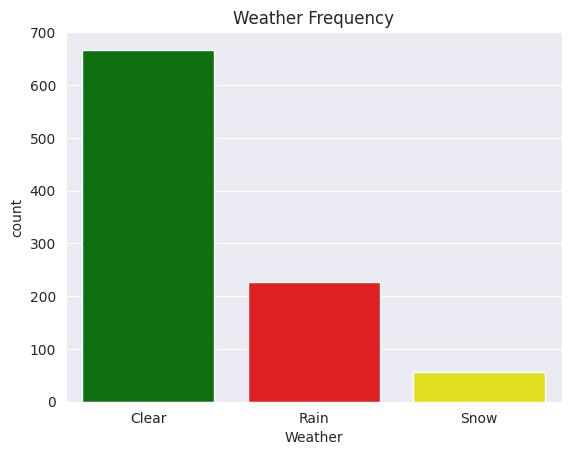

In [34]:
custom_color = ['Green', 'Red', 'Yellow']
sns.countplot(x=df['Weather'], palette=custom_color)
plt.title("Weather Frequency")

<Axes: ylabel='count'>

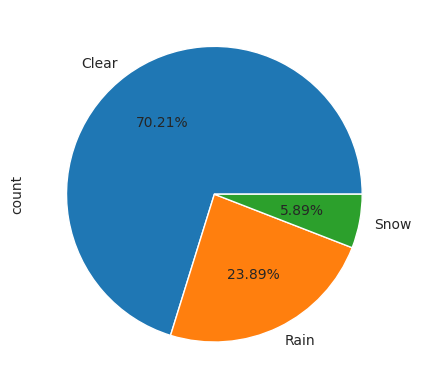

In [35]:
df['Weather'].value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: xlabel='Base_Fare', ylabel='Count'>

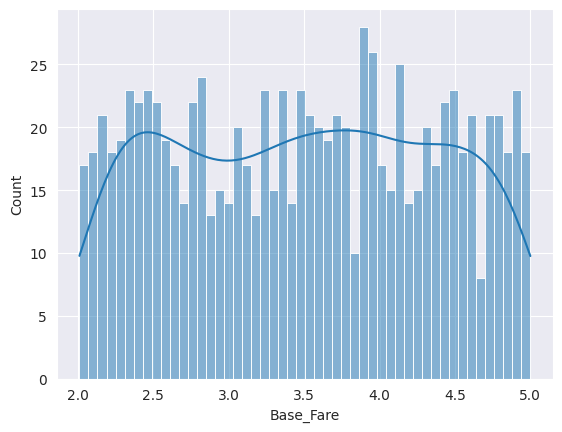

In [36]:
sns.histplot(df['Base_Fare'], bins=50, kde=True)

<Axes: xlabel='Base_Fare', ylabel='Count'>

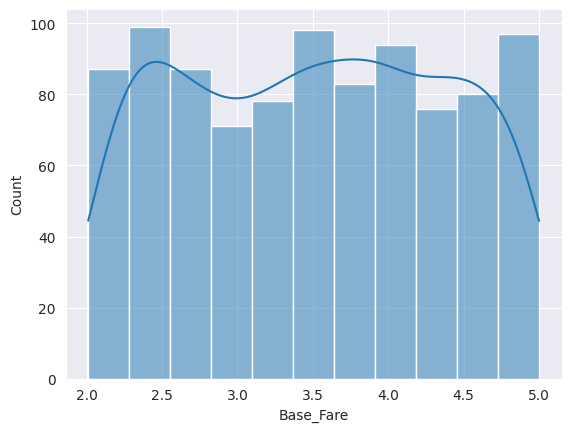

In [37]:
sns.histplot(df['Base_Fare'], kde=True)

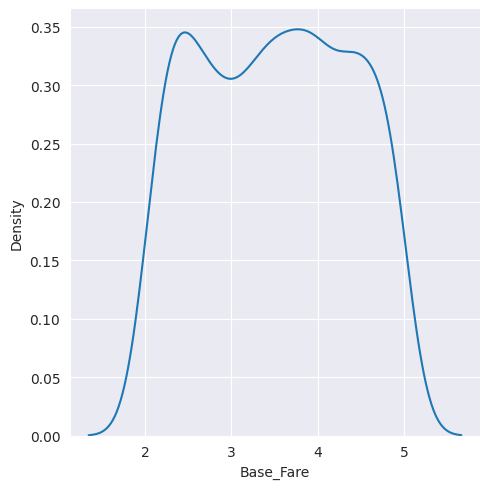

In [38]:
# TO DETECT SKEWNESS
sns.displot(data=df, x='Base_Fare', kind="kde")

<Axes: ylabel='Trip_Distance_km'>

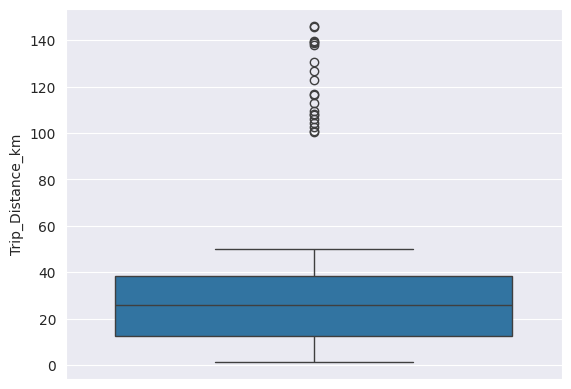

In [40]:
# BOXPLOT TO DETECT OUTLIERS
sns.boxplot(df['Trip_Distance_km'])

# BIVARIATE/MULTIVARIATE ANALYSIS
---
- Bivariate analysis examines two variables/columns/features simultaneously to identify relationships, patterns, or associations between them. Analysis of more than two features/variables/columns is called as multivariate analysis. Through this analysis, we can find out the following:
    - Describe the main characteristics of two variables/features/columns.
    - Prepare the data for further analysis or modeling.
    - Identify correlations or associations between two variables.
    - Explore how one variable affects another.
    - Determine the type of relationship: linear, non-linear etc.
- The bivariate/multivariate analysis implementation in different ways is shown below:

In [20]:
dataset_path = '/home/faran/Downloads/archive(3)/tip.csv'
df = pd.read_csv(dataset_path)
#Random Rows
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
212,48.33,9.00,Male,No,Sat,Dinner,4
99,12.46,1.50,Male,No,Fri,Dinner,2
232,11.61,3.39,Male,No,Sat,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
158,13.39,2.61,Female,No,Sun,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

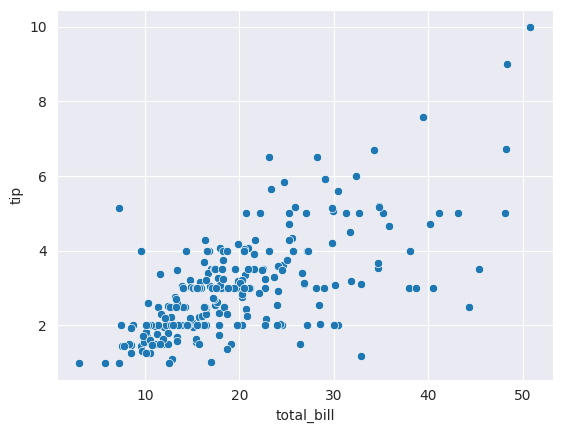

In [21]:
sns.scatterplot(x=df['total_bill'], y=df['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

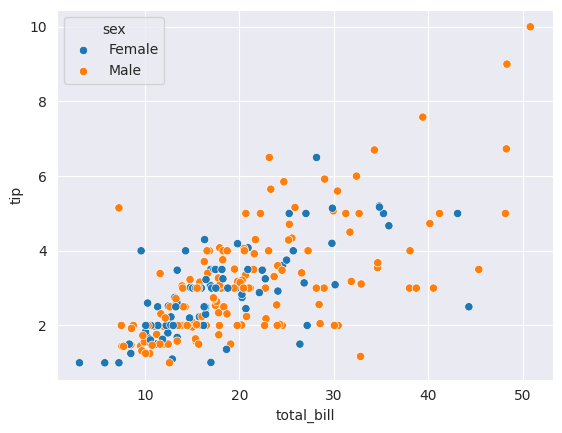

In [22]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

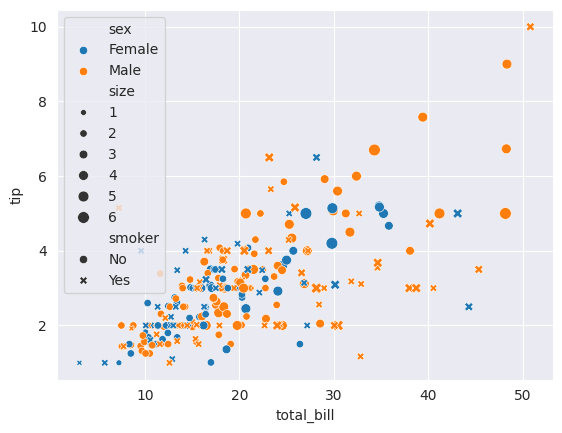

In [23]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], style=df['smoker'], size=df['size'])

# TASK 1
- Download any dataset of your own choice having numerical and categorical data. Find out the basic data understanding information such as few of the random rows, shape of the dataset, information of the variables, either any empty or null row exist or not.

In [4]:
dataset_path = '/home/faran/Downloads/archive(4)/IRIS.csv'
df = pd.read_csv(dataset_path)
#Random Rows
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,Iris-setosa
141,6.9,3.1,5.1,2.3,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# TASK 2
- Apply the concepts of the univariate on the dataset downloaded in task number 1 Clearly indicate the information regarding the numerical and categorical variable data. There should be plot of frequency of variable data in the dataset along with the percentage shown of all individual as well. Detect the noisy data as well and show the result in the visuals. Visualize the skewness nature of the data as well.

In [9]:
pd.value_counts(df['species'])

/tmp/ipykernel_4922/2343048660.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['species'])


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

/tmp/ipykernel_4922/3520488971.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['species'], palette='Set2')


Text(0.5, 1.0, 'Species Frequency')

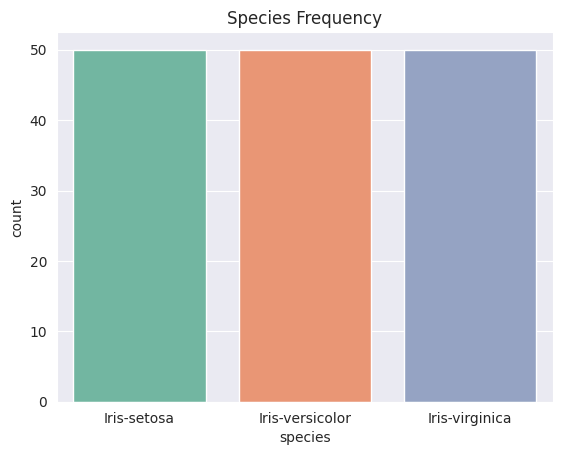

In [10]:
sns.countplot(x=df['species'], palette='Set2')
plt.title("Species Frequency")

<Axes: ylabel='count'>

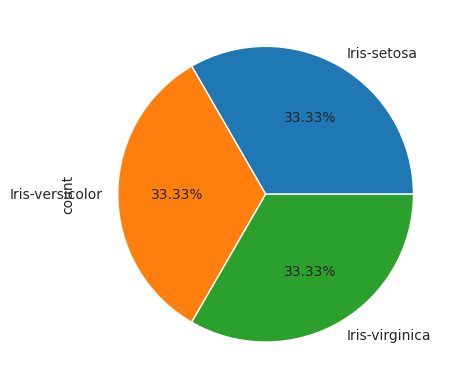

In [11]:
df['species'].value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: xlabel='petal_length', ylabel='Count'>

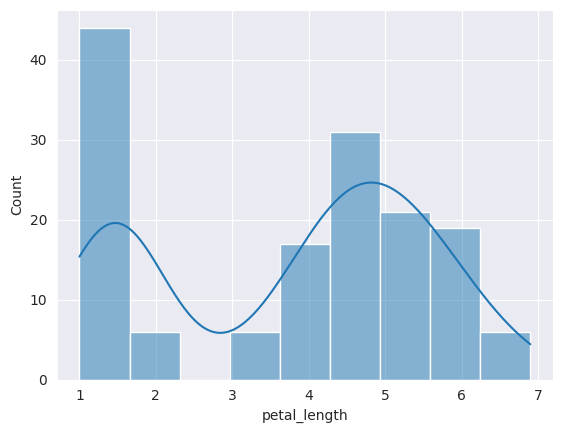

In [17]:
sns.histplot(df['petal_length'], kde=True)

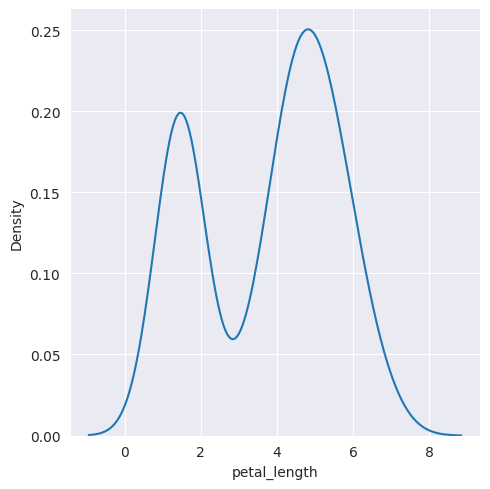

In [18]:
sns.displot(data=df, x='petal_length', kind="kde")

<Axes: ylabel='petal_length'>

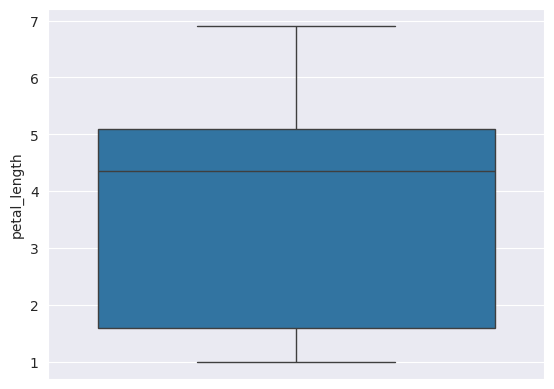

In [20]:
sns.boxplot(df['petal_length'])

# TASK 3
- Apply the concepts of the bivariate or multi-variate on any dataset having numerical and categorical data. Plot any two variables and find out either the nature is linear or not. Also calculate the multi-variate up to 5 variables.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

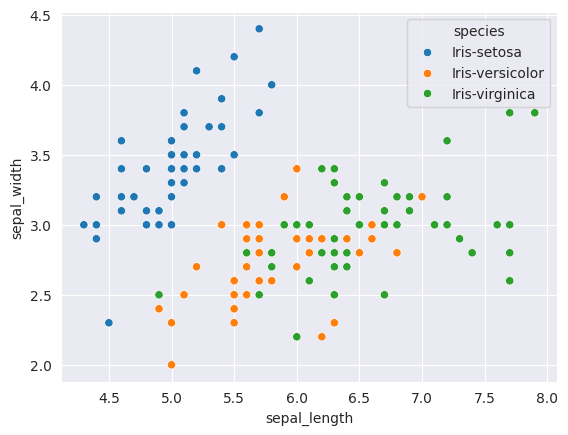

In [22]:
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'])